# Statistical Data Analysis

In this section, we look at the correlations looked at in the previous sectiona nd try to test their statistical significance. We will also capture new correlations

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp


In [65]:
import ast
def str2list(text):
    # print(text)
    init_ls = text.strip('[]').split(',')
    #print (init_ls[1])
    final_ls = [X.strip(' ').strip('\'') for X in init_ls]
    # print(final_ls[1])
    tag_ls = ['tag_'+X for X in final_ls]
    return tag_ls
        

In [66]:
# Read the output of Data Storytelling
df_clean = pd.read_csv(r'After_Storytelling.csv', index_col = 0)
df_clean.index.name = "index"

In [67]:
print ('Shape is', df_clean.shape)
df_clean.head(3)

Shape is (2314, 34)


,description,duration,event,main_speaker,speaker_occupation,tags,title,transcript,film_datestamp,pub_datestamp,...,Confusing,Informative,Fascinating,Unconvincing,OK,Inspiring,event_type,Max_rating,ratings_total,word_per_min
index,,,,,,,,,,,,,,,,,,,,,
0,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,Ken Robinson,Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,Good morning. How are you?(Laughter)It's been ...,2006-02-25 00:00:00,2006-06-27 00:11:00,...,0.007035,0.082160,0.118341,0.005693,0.013130,0.398474,TED,Inspiring,89411,163
1,With the same humor and humanity he exuded in ...,977,TED2006,Al Gore,Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,"Thank you so much, Chris. And it's truly a gre...",2006-02-25 00:00:00,2006-06-27 00:11:00,...,0.062057,0.157092,0.046809,0.137943,0.071986,0.241489,TED,Inspiring,2820,127
2,New York Times columnist David Pogue takes aim...,1286,TED2006,David Pogue,Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,"(Music: ""The Sound of Silence,"" Simon & Garfun...",2006-02-24 00:00:00,2006-06-27 00:11:00,...,0.037906,0.142599,0.059928,0.088809,0.052708,0.166065,TED,Funny,2770,157


# Parse Tags

In [68]:
df_clean.tags = df_clean.tags.apply(str2list)

In [74]:
tags_all = df_clean.tags
tag_dict = {}

In [86]:
for ls_tags in tags_all:
    for tag in ls_tags:
        if tag in tag_dict:
            tag_dict[tag] = tag_dict[tag]+1
        else:
            tag_dict[tag] = 0


In [91]:
print ('We have %d unique tags assigned to all the talks'%len(tag_dict))

We have 416 unique tags assigned to all the talks


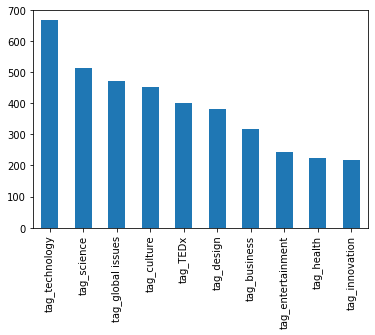

In [104]:
pd.Series(tag_dict).sort_values(ascending = False)[0:10].plot.bar()

In [77]:


example = [[1, 2, 3],[4 , 5]]


In [81]:
a = [1,2,3]
a.append([1, 4, 5])
a

[1, 2, 3, [1, 4, 5]]

In [83]:
df_clean.tags.apply(pd.Series)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
index,,,,,,,,,,,,,,,,,,,,,
0,tag_children,tag_creativity,tag_culture,tag_dance,tag_education,tag_parenting,tag_teaching,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tag_alternative energy,tag_cars,tag_climate change,tag_culture,tag_environment,tag_global issues,tag_science,tag_sustainability,tag_technology,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tag_computers,tag_entertainment,tag_interface design,tag_media,tag_music,tag_performance,tag_simplicity,tag_software,tag_technology,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tag_MacArthur grant,tag_activism,tag_business,tag_cities,tag_environment,tag_green,tag_inequality,tag_politics,tag_pollution,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tag_Africa,tag_Asia,tag_Google,tag_demo,tag_economics,tag_global development,tag_global issues,tag_health,tag_math,tag_statistics,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2462,tag_TED Residency,tag_United States,tag_community,tag_family,tag_immigration,tag_journalism,tag_social change,tag_society,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2463,tag_Mars,tag_South America,tag_TED Fellows,tag_astrobiology,tag_biology,tag_exploration,tag_extraterrestrial life,tag_science,tag_universe,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2464,tag_AI,tag_ants,tag_fish,tag_future,tag_innovation,tag_insects,tag_intelligence,tag_robots,tag_science,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
pd.Series(df_clean[['tags']])

ValueError: Wrong number of items passed 1, placement implies 2314

In [57]:
type(df_clean.tags[0])

list

In [24]:
ls[1].strip(' ').strip('\'')

'creativity'

In [26]:
[X.strip(' ').strip('\'') for X in ls]

['children',
 'creativity',
 'culture',
 'dance',
 'education',
 'parenting',
 'teaching']

In [125]:
# Convert string representation of list(tags) to actual list
df_clean.tags = df_clean.tags.str.strip('][').str.split(',')

AttributeError: Can only use .str accessor with string values!

In [126]:
extag = df_clean.tags[0]

In [127]:
extag

["'children'",
 " 'creativity'",
 " 'culture'",
 " 'dance'",
 " 'education'",
 " 'parenting'",
 " 'teaching'"]

In [133]:
for X in extag:
    print(type(X))
    print (X)

<class 'str'>
'children'
<class 'str'>
 'creativity'
<class 'str'>
 'culture'
<class 'str'>
 'dance'
<class 'str'>
 'education'
<class 'str'>
 'parenting'
<class 'str'>
 'teaching'


In [124]:
[X.strip('\'') for X in extag] 

['children',
 " 'creativity",
 " 'culture",
 " 'dance",
 " 'education",
 " 'parenting",
 " 'teaching"]

In [129]:
word = '\'example\''
word

"'example'"

In [130]:
word.strip('\'')

'example'

## Make the dataset suitable for data analysis and prediction

In [105]:
df_clean.columns

Index(['description', 'duration', 'event', 'main_speaker',
       'speaker_occupation', 'tags', 'title', 'transcript', 'film_datestamp',
       'pub_datestamp', 'sentence_count', 'word_count', 'applause', 'laughter',
       'music', 'cheering', 'sighs', 'singing', 'video', 'audio', 'Funny',
       'Beautiful', 'Ingenious', 'Courageous', 'Confusing', 'Informative',
       'Fascinating', 'Unconvincing', 'OK', 'Inspiring', 'event_type',
       'Max_rating', 'ratings_total', 'word_per_min'],
      dtype='object')

In [106]:
ratings = ['Funny', 'Beautiful', 'Ingenious', 'Courageous', 'Confusing', 'Informative', 'Fascinating', 'Unconvincing', 'OK', 'Inspiring']
print ('Number of potential predictors are ', len(ratings))

Number of potential predictors are  10


In [107]:
predictors_df = df_clean[ratings + ['Max_rating']]

In [108]:
predictors_df.head()

,Funny,Beautiful,Ingenious,Courageous,Confusing,Informative,Fascinating,Unconvincing,OK,Inspiring,Max_rating
index,,,,,,,,,,,
0,0.219716,0.051146,0.067922,0.036383,0.007035,0.082160,0.118341,0.005693,0.013130,0.398474,Inspiring
1,0.192908,0.020567,0.019858,0.049291,0.062057,0.157092,0.046809,0.137943,0.071986,0.241489,Inspiring
2,0.348014,0.021661,0.066065,0.016245,0.037906,0.142599,0.059928,0.088809,0.052708,0.166065,Funny
3,0.016867,0.083190,0.030017,0.217267,0.024300,0.108634,0.037736,0.020297,0.024300,0.437393,Inspiring
4,0.063517,0.043045,0.146317,0.014531,0.008317,0.248264,0.210473,0.005849,0.011332,0.248355,Inspiring


In [109]:
X_list = list(set(df_clean.columns) - set(ratings+['Max_rating']))

In [110]:
X_df = df_clean[X_list]

In [111]:
X_df.columns

Index(['speaker_occupation', 'pub_datestamp', 'singing', 'title',
       'word_per_min', 'main_speaker', 'description', 'sighs', 'tags', 'music',
       'audio', 'transcript', 'sentence_count', 'word_count', 'ratings_total',
       'laughter', 'video', 'film_datestamp', 'applause', 'event', 'duration',
       'event_type', 'cheering'],
      dtype='object')

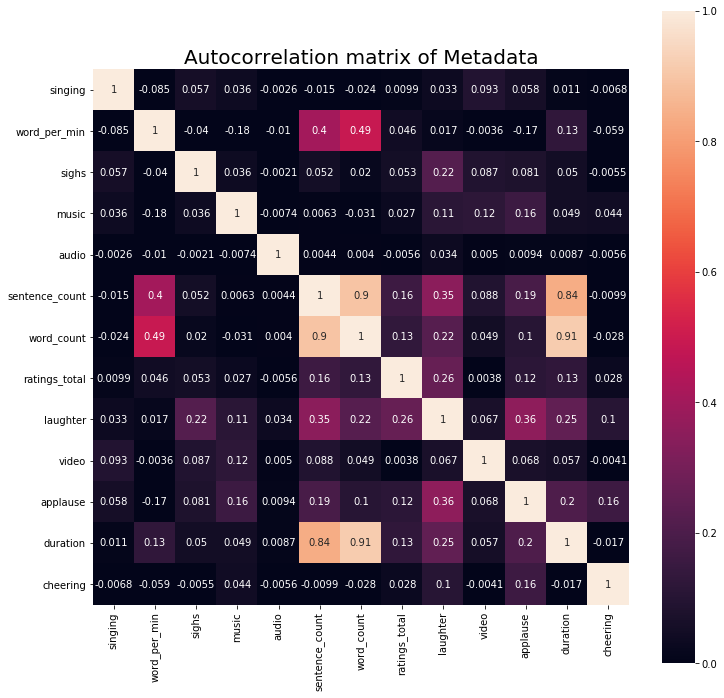

In [112]:
corr = X_df.corr()
_ = plt.figure(figsize = (12,12))
_ = plt.title("Autocorrelation matrix of Metadata", size = 20)
sns.heatmap(corr, vmin = 0, vmax = 1, annot = True, square = True)

We do not see any obvious autocorrelated data except for obvious ones like sentence count, word count and duration

## Define count vectorizer

In [113]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

In [114]:
vectorizer.fit(X_df.transcript)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [115]:
BagOfWords = vectorizer.transform(X_df.transcript)

In [116]:
BagOfWords = BagOfWords.tocsc()

In [117]:
type(BagOfWords)

scipy.sparse.csc.csc_matrix

In [118]:
BagOfWords.vocabulary_

AttributeError: vocabulary_ not found

In [ ]:
a = 'example'

In [ ]:
a + 'test', res = ini_list.strip('][').split(', ') 